<a href="https://colab.research.google.com/github/CaioPassos3/Metaheuristica/blob/main/RoteamentoDeVeiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questão 1

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Exemplo de matriz de distâncias (inclui depósito como índice 0)
matriz_distancias = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

# Exemplo de solução para o PRV (visita os clientes 1, 2, 3 na ordem)
solucao_exemplo = [1, 2, 3]

# Função para calcular a distância total percorrida (Exercício 1)
def calcular_distancia_total(solucao, matriz_distancias):
    distancia_total = 0
    # Adiciona a distância do depósito para o primeiro cliente
    distancia_total += matriz_distancias[0][solucao[0]]
    # Adiciona as distâncias entre os clientes na sequência
    for i in range(len(solucao) - 1):
        distancia_total += matriz_distancias[solucao[i]][solucao[i + 1]]
    # Adiciona a distância do último cliente de volta para o depósito
    distancia_total += matriz_distancias[solucao[-1]][0]
    return distancia_total

Questão 2

Comparando parâmetros...

Iterações: 100, Vizinhança: 5 -> Distância: 80, Solução: [2, 3, 1]
Iterações: 100, Vizinhança: 10 -> Distância: 80, Solução: [2, 3, 1]
Iterações: 100, Vizinhança: 20 -> Distância: 80, Solução: [1, 3, 2]
Iterações: 500, Vizinhança: 5 -> Distância: 80, Solução: [2, 3, 1]
Iterações: 500, Vizinhança: 10 -> Distância: 80, Solução: [1, 3, 2]
Iterações: 500, Vizinhança: 20 -> Distância: 80, Solução: [2, 3, 1]
Iterações: 1000, Vizinhança: 5 -> Distância: 80, Solução: [2, 3, 1]
Iterações: 1000, Vizinhança: 10 -> Distância: 80, Solução: [2, 3, 1]
Iterações: 1000, Vizinhança: 20 -> Distância: 80, Solução: [2, 3, 1]


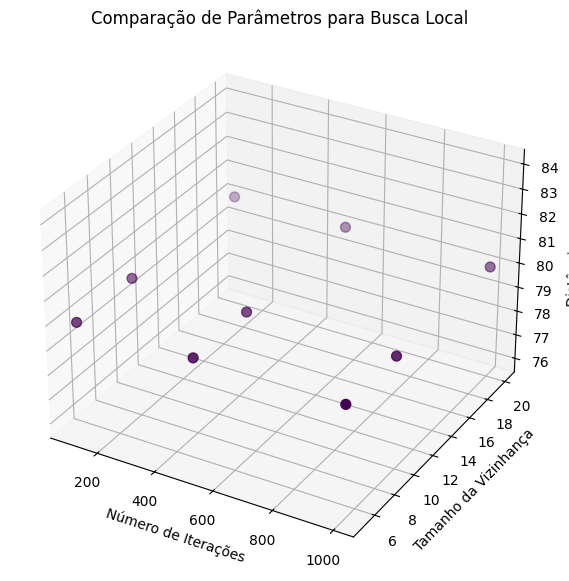


Melhor configuração encontrada:
Iterações: 100, Vizinhança: 5
Distância: 80


(100, 5, 80)

In [8]:
import random
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Exemplo de matriz de distâncias (inclui depósito como índice 0)
matriz_distancias = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

# Função para calcular a distância total percorrida
def calcular_distancia_total(solucao, matriz_distancias):
    distancia_total = 0
    distancia_total += matriz_distancias[0][solucao[0]]
    for i in range(len(solucao) - 1):
        distancia_total += matriz_distancias[solucao[i]][solucao[i + 1]]
    distancia_total += matriz_distancias[solucao[-1]][0]
    return distancia_total

# Gera uma solução inicial aleatória
def gerar_solucao_inicial(num_clientes):
    solucao = list(range(1, num_clientes + 1))
    random.shuffle(solucao)
    return solucao

# Função para gerar vizinhos (troca dois clientes de posição)
def gerar_vizinhos(solucao):
    vizinhos = []
    for i in range(len(solucao)):
        for j in range(i + 1, len(solucao)):
            vizinho = solucao[:]
            vizinho[i], vizinho[j] = vizinho[j], vizinho[i]
            vizinhos.append(vizinho)
    return vizinhos

# Algoritmo de busca local
def busca_local(matriz_distancias, num_iteracoes, vizinhanca_max):
    melhor_solucao = gerar_solucao_inicial(len(matriz_distancias) - 1)
    melhor_distancia = calcular_distancia_total(melhor_solucao, matriz_distancias)

    for _ in range(num_iteracoes):
        vizinhos = gerar_vizinhos(melhor_solucao)
        # Limita a quantidade de vizinhos avaliados
        vizinhos = random.sample(vizinhos, min(len(vizinhos), vizinhanca_max))

        for vizinho in vizinhos:
            distancia = calcular_distancia_total(vizinho, matriz_distancias)
            if distancia < melhor_distancia:
                melhor_solucao, melhor_distancia = vizinho, distancia

    return melhor_solucao, melhor_distancia

# Comparação para diferentes parametrizações com visualização
def comparar_parametros_e_plotar(matriz_distancias):
    num_iteracoes_list = [100, 500, 1000]
    vizinhanca_max_list = [5, 10, 20]

    resultados = []

    print("Comparando parâmetros...\n")
    for num_iteracoes in num_iteracoes_list:
        for vizinhanca_max in vizinhanca_max_list:
            solucao, distancia = busca_local(matriz_distancias, num_iteracoes, vizinhanca_max)
            resultados.append((num_iteracoes, vizinhanca_max, distancia))
            print(f"Iterações: {num_iteracoes}, Vizinhança: {vizinhanca_max} -> Distância: {distancia}, Solução: {solucao}")

    # Separar os resultados para plotagem
    iteracoes = [r[0] for r in resultados]
    vizinhancas = [r[1] for r in resultados]
    distancias = [r[2] for r in resultados]

    # Criar um gráfico 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(iteracoes, vizinhancas, distancias, c=distancias, cmap='viridis', s=50)
    ax.set_xlabel('Número de Iterações')
    ax.set_ylabel('Tamanho da Vizinhança')
    ax.set_zlabel('Distância Total')
    ax.set_title('Comparação de Parâmetros para Busca Local')
    plt.show()

    # Encontrar e imprimir a melhor configuração
    melhor_configuracao = min(resultados, key=lambda x: x[2])
    print("\nMelhor configuração encontrada:")
    print(f"Iterações: {melhor_configuracao[0]}, Vizinhança: {melhor_configuracao[1]}")
    print(f"Distância: {melhor_configuracao[2]}")
    return melhor_configuracao

# Executando a comparação e plotando os resultados
comparar_parametros_e_plotar(matriz_distancias)
